In [23]:
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as sts
import numpy as np
import os
import statsmodels.api as sm 
from matplotlib import pyplot as plt

In [24]:
property_sales_path = os.path.join('Resources', 'property_sales.csv')
property_sales_df = pd.read_csv(property_sales_path)
property_sales_df.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001


In [25]:
victory_neighborhood = property_sales_df[property_sales_df.Neighborhoood == 'VICTORY']
victory_gross_sale = victory_neighborhood["Gross_Sale"]
victory_hist = px.histogram(victory_gross_sale)
victory_hist.update_layout(xaxis_title="Price", yaxis_title="Counts")

In [26]:
#from the above histogram the data is normal with outliers on the highest prices.

In [27]:
df = pd.DataFrame()
df["Gross Sale"] = victory_gross_sale
df

,Gross Sale
0,159900.0
1,169500.0
2,169500.0
3,162500.0
7,167000.0
...,...
9130,353000.0
9133,242000.0
9135,181111.0
9137,287500.0


In [28]:
print (sts.normaltest(df.dropna()['Gross Sale']))

NormaltestResult(statistic=116.93506528192052, pvalue=4.053901605972729e-26)


In [29]:
#cleaning data
victory_clean = victory_gross_sale.dropna()

In [30]:
sample_one = np.random.choice(victory_clean, size =100, replace=True)
sample_two = np.random.choice(victory_clean, size=100, replace=True)

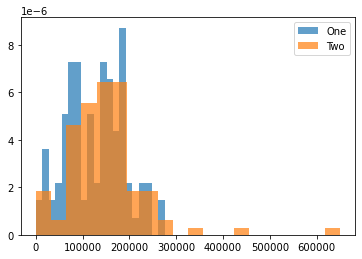

In [31]:
plt.hist(sample_one, 20, density=True, alpha=0.7, label="One")
plt.hist(sample_two, 20, density=True, alpha=0.7, label="Two")
plt.legend()

In [32]:
sts.ttest_ind(sample_one, sample_two, equal_var=False)

Ttest_indResult(statistic=-2.2087329460046954, pvalue=0.028443989442394478)

In [33]:
#from the above data both samples looks very similar from the  high pvalue